In [1]:
import os
import sys
import pandas as pd
import numpy as np
sys.path.append(os.path.dirname(os.path.abspath(os.getcwd())) + "/..")
if os.getcwd().endswith("Topic3"):
    os.chdir("..")
    print(f"Changed to {os.getcwd()}")

from codebase import load_demograhics, load_buurt_data, willingness_to_cycle, add_willingness_to_cycle_column, punt_buurt_code_column

Changed to c:\Users\toell\Documents\GitHub\Design-of-AI-driven-business-operation


In [2]:
mode = "fiets"
punt1 = "hbo_wo"
location = "Universities"

df_demographics = load_demograhics()
df_punt = load_buurt_data(punt1, mode=mode)

Loaded file from CSV


In [3]:
df_punt.columns

Index(['hbo_wo_id', 'bu_code', 'reistijd_min', 'reisafstand_m',
       'afstand_hemelsbreed_m', 'omrijdfactor'],
      dtype='object')

Demographics and filtered dataframes do not match in length: 11783 vs 11784, ignoring missing values


<Figure size 1000x1000 with 0 Axes>

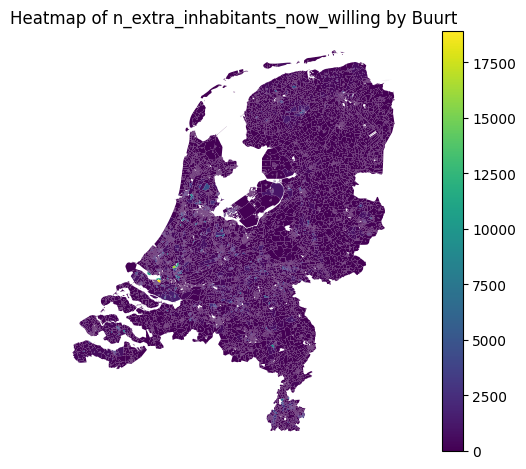

In [6]:
from codebase import calculate_added_willingness
improvement_column="n_extra_inhabitants_now_willing"
df_with_willingness = calculate_added_willingness(
    df_punt, 
    df_demographics,
    mode=mode,
    location=location,
    detour_max=1.2,
    detour_reduction=0.8,
    improvement_column=improvement_column
)

In [13]:
top_n = 10
df_with_willingness.sort_values(by=improvement_column, ascending=False)[["bu_code", improvement_column]][:top_n]

,bu_code,n_extra_inhabitants_now_willing
5825,BU05991699,18882
5810,BU05991463,16254
5811,BU05991466,11507
5839,BU05992704,10606
5813,BU05991468,10383
5824,BU05991692,10382
7463,BU08470000,9334
4274,BU03940116,8595
4694,BU04797230,8373
6341,BU06780000,7635
